In [27]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [25]:
encoder = keras.layers.TFSMLayer("encoder-sm", call_endpoint='serve',
    call_training_endpoint=None,
    trainable=True,
    name=None,
    dtype=None
)


In [26]:
encoder(np.zeros((1, 28, 28, 1))).shape

TensorShape([1, 2, 2, 4])

In [42]:
import os
import PIL.Image
top = "C:\\Users\\yohan.chalier\\Desktop\\Démo espace latent\\Lettres"
filenames = next(os.walk(top))[2]
letters_latent = {}
for filename in filenames:
    path = os.path.join(top, filename)
    arr = np.array(PIL.Image.open(path))
    arr = np.mean(arr, axis=2).reshape((1, 28, 28, 1)) / 255
    latent = encoder(arr)
    letter = os.path.splitext(filename)[0]
    letters_latent[letter] = latent


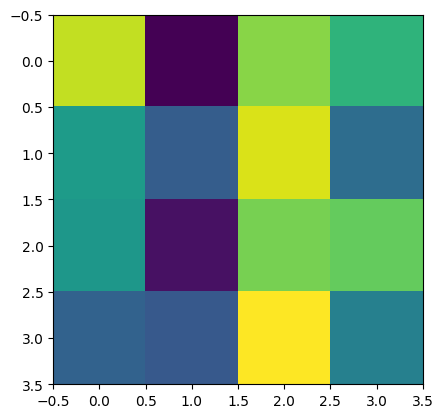

In [50]:
plt.imshow(np.array(letters_latent["A"]).reshape(4, 4))

In [51]:
decoder = keras.layers.TFSMLayer("decoder-sm", call_endpoint='serve',
    call_training_endpoint=None,
    trainable=True,
    name=None,
    dtype=None
)

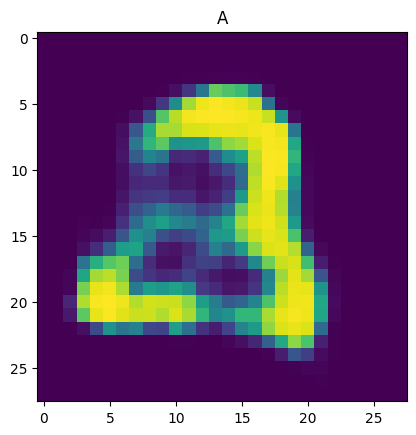

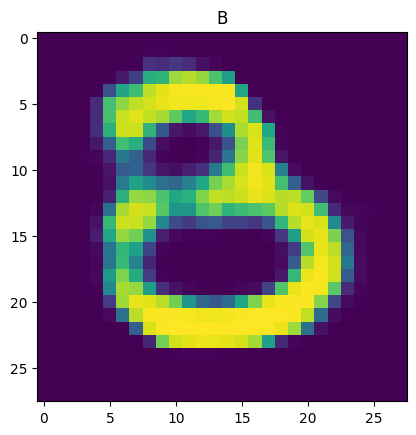

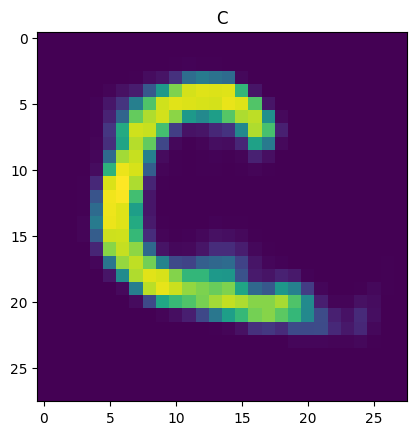

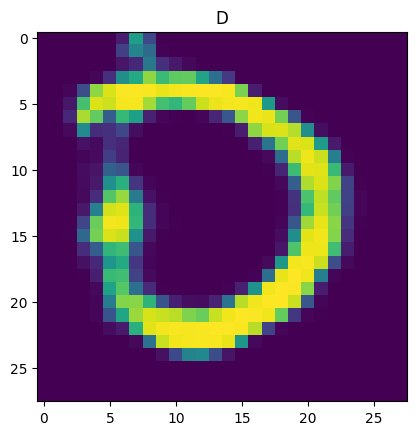

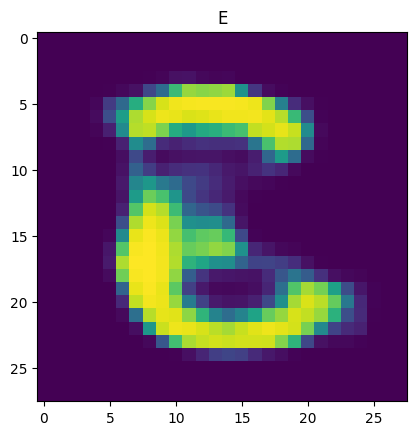

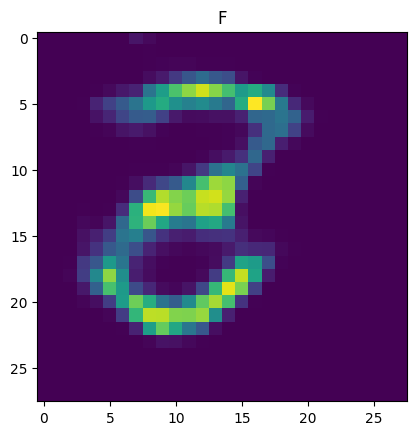

In [56]:
for letter, latent in letters_latent.items():
    img = decoder(latent)
    plt.figure()
    plt.title(letter)
    plt.imshow(np.array(img).reshape(28, 28))
    